In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os,sys 
from IPython.display import Image


import os, re, glob
import cv2
import numpy as np
import shutil
from numpy import argmax
from keras.models import load_model

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [18]:
import os, re, glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


#filepath='/Users/jaewon/Desktop/EEGTest/images/'
filepath='/Users/jaewon/Desktop/spectrogram/B0101T/'
X=[]
Y=[]

image_w = 120
image_h = 120


def getimg(filepath):
    for file in os.listdir(filepath):  
        temp=[]
        img=cv2.imread(filepath+file)
        img=cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
        if "chan01" in file:
            img1=img
        elif "chan02" in file:
            img2=img
        elif "chan03" in file:
            img3=img

            #이미지를 뒤로 쌓을때
            s_fir=[] 
            for fir in range(image_h):
                s_sec=[]
                for sec in range(image_w):
                    s_sec.append(np.concatenate((img1[fir][sec], img2[fir][sec],img3[fir][sec]), axis=None))
                s_fir.append(s_sec)
            X.append(s_fir)
            
            #이미지를 옆으로 쌓을때
            #s=cv2.vconcat([img1,img2,img3]) #X.append(s) 

            if "right" in file:
                Y.append(0)
            elif "left in file":
                Y.append(1)
            else:
                print("error")
        else:
            print("error")
            
getimg(filepath)
#filepath='/Users/jaewon/Desktop/spectrogram/B0302T/'   
#getimg(filepath)
filepath='/Users/jaewon/Desktop/spectrogram/B0201T/'
getimg(filepath)
filepath='/Users/jaewon/Desktop/spectrogram/B0202T/'
getimg(filepath)
filepath='/Users/jaewon/Desktop/spectrogram/B0301T/'
getimg(filepath)
filepath='/Users/jaewon/Desktop/spectrogram/B0302T/'
getimg(filepath)

X = np.array(X)
Y = np.array(Y)
 
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

(475, 120, 120, 9)
(475,)


In [19]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test,Y_test)
X_val.shape

(30, 120, 120, 9)

In [25]:
from keras.callbacks import EarlyStopping


#학습용
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(2, (3, 3), padding='same', activation='relu', input_shape=(image_w,image_h,9)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Conv2D(2, (2, 2), padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(227, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

early_stopping=EarlyStopping(monitor='val_loss',patience=5)
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=model.fit(X_train, Y_train, batch_size=10, nb_epoch=20,validation_data=(X_val, Y_val))#,callbacks=[early_stopping]


Train on 356 samples, validate on 30 samples
Epoch 1/20
356/356 [==============================] - 4s 10ms/sample - loss: 1.4261 - accuracy: 0.4775 - val_loss: 3.3627 - val_accuracy: 0.4667
Epoch 2/20
356/356 [==============================] - 3s 8ms/sample - loss: 0.7486 - accuracy: 0.6152 - val_loss: 4.1906 - val_accuracy: 0.4667
Epoch 3/20
356/356 [==============================] - 3s 8ms/sample - loss: 0.7319 - accuracy: 0.5927 - val_loss: 1.6914 - val_accuracy: 0.5333
Epoch 4/20
356/356 [==============================] - 3s 8ms/sample - loss: 0.6617 - accuracy: 0.6236 - val_loss: 0.7327 - val_accuracy: 0.6000
Epoch 5/20
356/356 [==============================] - 3s 8ms/sample - loss: 0.5972 - accuracy: 0.6657 - val_loss: 0.8316 - val_accuracy: 0.3667
Epoch 6/20
356/356 [==============================] - 3s 8ms/sample - loss: 0.5664 - accuracy: 0.7191 - val_loss: 0.7793 - val_accuracy: 0.6000
Epoch 7/20
356/356 [==============================] - 3s 8ms/sample - loss: 0.5354 - accur

In [26]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2) #실제 test_data 테스트 결과
print(test_loss, test_acc)

89/1 - 1s - loss: 1.1747 - accuracy: 0.4944
1.027164338679796 0.49438202


No handles with labels found to put in legend.


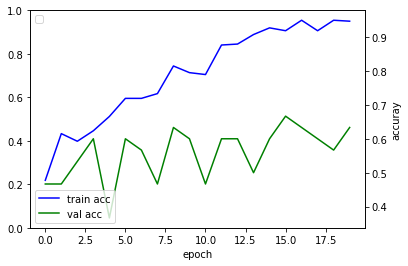

In [27]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

No handles with labels found to put in legend.


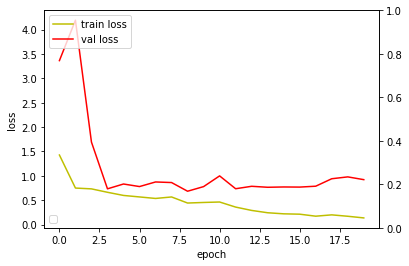

In [28]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()